In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Q1
## Load Data

In [8]:
df_train = pd.read_csv('data_info.csv')
df_train

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


# Q2
## Data Exploration

In [11]:
df_train.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [14]:
"""
Here we can see some specifications of column 'crew', which is our target. We see some statistical metrics
such as overall record count, mean, standard deviation, minimum value, maximum value, etc. 
"""
df_train['crew'].describe()

count    158.000000
mean       7.794177
std        3.503487
min        0.590000
25%        5.480000
50%        8.150000
75%        9.990000
max       21.000000
Name: crew, dtype: float64

### data exploration:

This dataset contains data of some passenger ships which is gathered into a 158 x 9 dataframe (meaning this dataset is made up of 158 records and 9 columns.)

The columns are : 'ship_name', 'cruise_line', 'age', 'tonnage', 'passengers', 'length', 'cabins', 'passenger_density' and 'crew'; which is our most important field to study and discuss.


###### What does every field (column name) stand for?
* ship_name: clearly the name of each ship
* cruise_line: the company which provides ship travels and services
* age: age of the ship 
* tonnage: how much weight does the ship handle?
* passengers: passenger capacity of the ship
* length: length of the ship from nose to the end
* cabins: number of cabins in the ship
* passenger density: ratio of passenger in the ship
* crew: number of the crew members 


###### Metrics:
* age: year
* tonnage: ton(s)
* passengers: person; (Its floating point values shows us that it is a calculated field. Clearly we have not a float number of people in the real world.
* length: meter(s)
* cabins: number; Also this sounds like a calculated field because we do not have float numbers in real world counting.
* passenger_density: % (percent)
* crew: person; Also it's a calculated field.


###### Relationship between each field and the number of the crew members:
cruis_line: I know this might be kind of wierd but in my opinion it can be related to the number of the crew members. I think each cruise_line can have a different policy for assigning the number of the crew members to each ship that it supports.

age: I think the more the ship gets old, the more crew members shall it need. Although the ratio couldn't be that straight but there is a logical relationship between these 2 fields (age and crew members).

tonnage x passengers: There is a 3-side relationship between these two fields and the number of the crew members needed. In fact, we know that tonnage and number of passengers are directly related ( in the passenger ships.) . So the more the tonnage grows, the more passengers the ship can have. Also we already know that the more passengers use the ship, the more crew members we need at the ship.

length x cabins x passenger_density: We can see a straight correlation between these 3 fields and number of the crew members. It's clear that the length of the ship can show us how big it is. So the more the ship length grows, the more crew members are needed. Also more cabins in a ship tells us we need more crew members. And also the more passenger_density we have, the more crew members we need.


###### Let's see what's going on ...

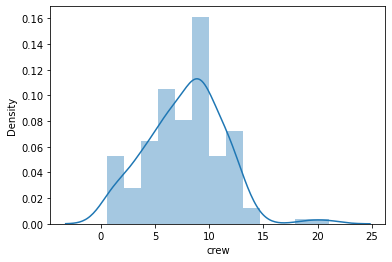

In [35]:
# histogram of crew
sns.distplot(df_train['crew']);

As we can see in the histogram (using seaborn library) this dataset :
* Deviates from the normal distribution.
* Has slightly positive skewness.
* Shows peakedness.

In [29]:
# skewness and kurtosis of crew
print(f"Skewness: {df_train['crew'].skew()}")
print(f"Kurtosis: {df_train['crew'].kurt()}")

Skewness: 0.19478713071101847
Kurtosis: 0.7864407847850337


According to the histogram and also the skewness and kurtosis metrics shown above, we can see the positive skewness and the positive kurtosis of the field "crew".

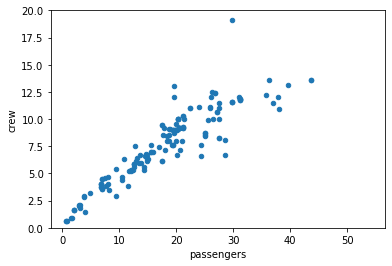

In [33]:
# scatter plot passengers/crew
var = 'passengers'
data = pd.concat([df_train['crew'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='crew', ylim=(0,20));

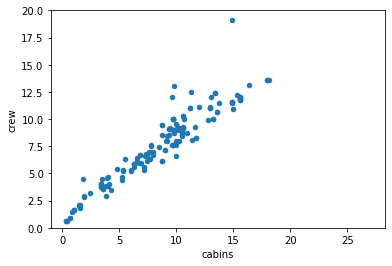

In [36]:
# scatter plot cabins/crew
var = 'cabins'
data = pd.concat([df_train['crew'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='crew', ylim=(0,20));

As it is shown above, it looks like the 'cabins' field has an appreciable correlation with the 'crew'. So this could be one of necessary columns to predict 'crew' size.

# Q3
## Feature Selection

- As we can see below, here we use Pearson correlation to figure out how much a numeric feature is correlated to the target feature 'crew'.
- We plot this correlation heatmap using seaborn to visualize the correlations between each numeric feature and feature 'crew'.

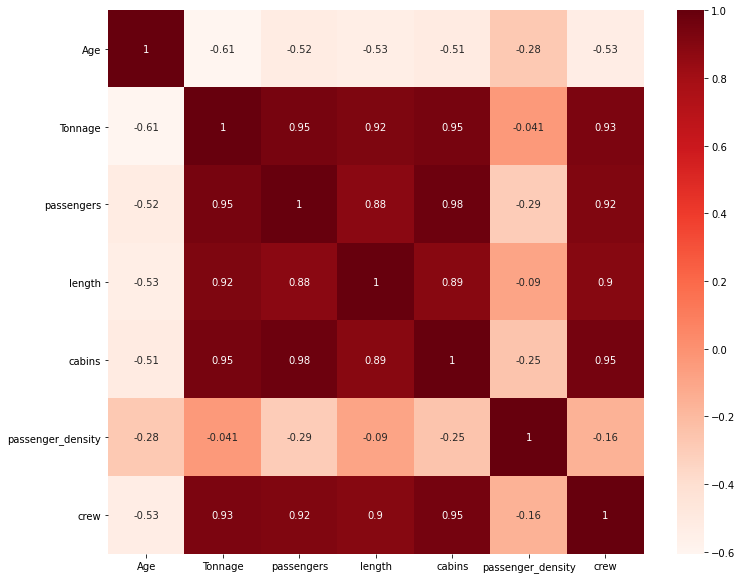

In [38]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

- Here we declare that our target feature is 'crew' and we only show relevant features.
- The term relevant here belongs to every feature that its absolute correlation with 'crew' is higher than 0.5 .

In [39]:
#Correlation with 'crew' variable
cor_target = abs(cor["crew"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Age           0.530657
Tonnage       0.927569
passengers    0.915234
length        0.895857
cabins        0.950823
crew          1.000000
Name: crew, dtype: float64

So, the feature 'passenger_density' here gets out from rest of the process. (0.16 < 0.5)

In [47]:
#Getting all the categorical columns 
categorical_columns = df_train.select_dtypes(exclude = 'number').columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Ship_name            158 non-null object
Cruise_line          158 non-null object
Age                  158 non-null int64
Tonnage              158 non-null float64
passengers           158 non-null float64
length               158 non-null float64
cabins               158 non-null float64
passenger_density    158 non-null float64
crew                 158 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [54]:
# Testing the relationship between a categorical feature and the target
chi_res = chi2_contingency(pd.crosstab(df_train['crew'], df_train['Cruise_line']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 2594.9842590061257, p-value: 1.317452944467631e-39


As we can see below, feature 'Ship_name' doesn't have relatoinship with 'crew' but 'Cruise_line' has one.

In [55]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df_train['crew'], df_train[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

        Column                      Hypothesis
0    Ship_name  Fail to Reject Null Hypothesis
1  Cruise_line          Reject Null Hypothesis


So finally we dropped features 'passenger_density' and 'Ship_name' from the rest of the process, because they weren't relevant to our target 'crew'.

# Q4
## Train and Test Sets

In [78]:
# select the relevant columns
df = df_train[['Cruise_line', 'Age', 'Tonnage', 'passengers', 'length', 'cabins', 'crew']]

# creating the target variable
y = df.crew
y

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [92]:
# creating splitted dataset
x = df.drop(['crew'], axis=1)
x2 = pd.get_dummies(x)
x2

,Age,Tonnage,passengers,length,cabins,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.4, shuffle=True)

In [96]:
x_train.shape, y_train.shape

((94, 25), (94,))

In [97]:
x_test.shape, y_test.shape

((64, 25), (64,))

# Q5

## Linear Regression Model

In [98]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [99]:
 model = linear_model.LinearRegression()

In [101]:
model.fit(x_train, y_train)

LinearRegression()

In [110]:
# prediction
y_pred = model.predict(x_test)

In [106]:
# display model performance 
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared Error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2): %.2f'
     % r2_score(y_test, y_pred))

Coefficients:  [ 2.30435926e-02  4.79151468e-03 -8.85739244e-02  7.89002719e-01
  6.51620028e-01  2.06790897e-01 -1.50508769e-01  3.09275318e-01
 -4.18733302e-01  2.68657183e-01  8.99233031e-01  3.33066907e-16
 -8.02347553e-01 -2.32465455e-01  4.40250663e-01  5.40614171e-01
 -9.84739950e-01 -4.99821916e-01 -1.07094190e-02  3.70148193e-01
 -1.12488361e+00  2.90194182e-01  0.00000000e+00  1.56680887e+00
 -6.67762531e-01]
Intercept:  -3.325349357406407
Mean Squared Error (MSE): 1.29
Coefficient of Determination (R^2): 0.92


In [108]:
y_test

37      6.36
15     11.60
56      8.42
155     0.88
140     6.60
       ...  
118     4.47
106     3.73
96     12.20
98      9.00
136     7.65
Name: crew, Length: 64, dtype: float64

In [112]:
y_pred

array([ 7.1070957 , 11.79437439,  8.44519539,  0.42247651,  7.8503118 ,
        6.34061308,  8.83548147,  8.28795136,  5.87919903,  9.86382628,
        9.82668238,  5.78987409,  8.85105166, 13.1798485 ,  4.95169266,
        5.41797689,  8.78192088, 10.89885607,  5.89512413,  1.46173844,
        8.78192088,  4.84164439, 11.82530801,  2.70178388,  1.95066915,
        6.05977139,  5.20607689,  5.07656573, 10.68305936, 10.99208195,
        2.73014191,  3.55      ,  5.27046294, 10.41529975,  1.1223204 ,
        8.89713884, -0.18297392,  8.11467173, 18.83283561,  7.41086091,
        8.4749403 ,  9.15257444, 11.25988361, 11.25988361,  5.13772072,
        8.12706169,  7.04640478,  1.53086922, 11.09870345, 11.87679155,
        3.6412244 ,  9.28661626,  9.17723756,  8.83003051,  1.95066915,
        9.86382628, 11.12690206,  8.09571952, 11.88580143,  3.34789363,
        3.44436611, 10.75928212,  9.64547948,  7.87335539])

<AxesSubplot:xlabel='crew'>

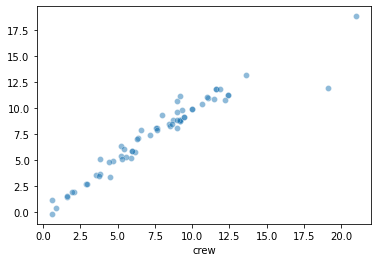

In [118]:
sns.scatterplot(y_test, y_pred, alpha=0.5)

 # Q6
 ## Pearson Correlation Coefficient

In [120]:
import numpy as np

In [125]:
my_pcc = np.corrcoef(x_train, x_test)
my_pcc

array([[1.        , 0.98383409, 0.99796392, ..., 0.97032006, 0.98948632,
        0.99377146],
       [0.98383409, 1.        , 0.99103291, ..., 0.99730546, 0.99821828,
        0.99326101],
       [0.99796392, 0.99103291, 1.        , ..., 0.98163295, 0.99340542,
        0.99859882],
       ...,
       [0.97032006, 0.99730546, 0.98163295, ..., 1.        , 0.99194892,
        0.98749613],
       [0.98948632, 0.99821828, 0.99340542, ..., 0.99194892, 1.        ,
        0.99297674],
       [0.99377146, 0.99326101, 0.99859882, ..., 0.98749613, 0.99297674,
        1.        ]])

# Q7
## Hyper parameters

In this model we've used Mean Squared Error (MSE) and Coefficient of Determination (R^2) as our hyperparameters.
* So clearly less MSE shows better performance of the model and vice versa.
* Also we have the Coefficient of Determination or shortly "R squared" which varies from 0 to 1 and is a statistical measure of how well the regression predictions approximate the real data points.  